## Credit Card Customer Churn

In [1]:
# import data packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import svm 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import metrics

%matplotlib inline

In [2]:
churn_df = pd.read_csv("BankChurners.csv", index_col = "CLIENTNUM")


## Exploratory Data Analysis

In [3]:
churn_df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                            
768805383  Existing Customer            45      M                3   
818770008  Existing Customer            49      F                5   
713982108  Existing Customer            51      M                3   
769911858  Existing Customer            40      F                4   
709106358  Existing Customer            40      M                3   

          Education_Level Marital_Status Income_Category Card_Category  \
CLIENTNUM                                                                
768805383     High School        Married     $60K - $80K          Blue   
818770008        Graduate         Single  Less than $40K          Blue   
713982108        Graduate        Married    $80K - $120K          Blue   
769911858     High School        Unknown  Less than $40K          Blue   
709106358      Uneducated        Married     $60K - $80K          Blue   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
768805383              39                         5                       1   
818770008              44                         6                       1   
713982108              36                         4                       1   
769911858              34                         3                       4   
709106358              21                         5                       1   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   
769911858                      1        3313.0                 2517   
709106358                      0        4716.0                    0   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
768805383          11914.0                 1.335             1144   
818770008           7392.0                 1.541             1291   
713982108           3418.0                 2.594             1887   
769911858            796.0                 1.405             1171   
709106358           4716.0                 2.175              816   

           Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
CLIENTNUM                                                              
768805383              42                1.625                  0.061  
818770008              33                3.714                  0.105  
713982108              20                2.333                  0.000  
769911858              20                2.333                  0.760  
709106358              28                2.500                  0.000

In [4]:
churn_df["Attrition_Flag"].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [5]:
churn_df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [6]:
churn_df.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

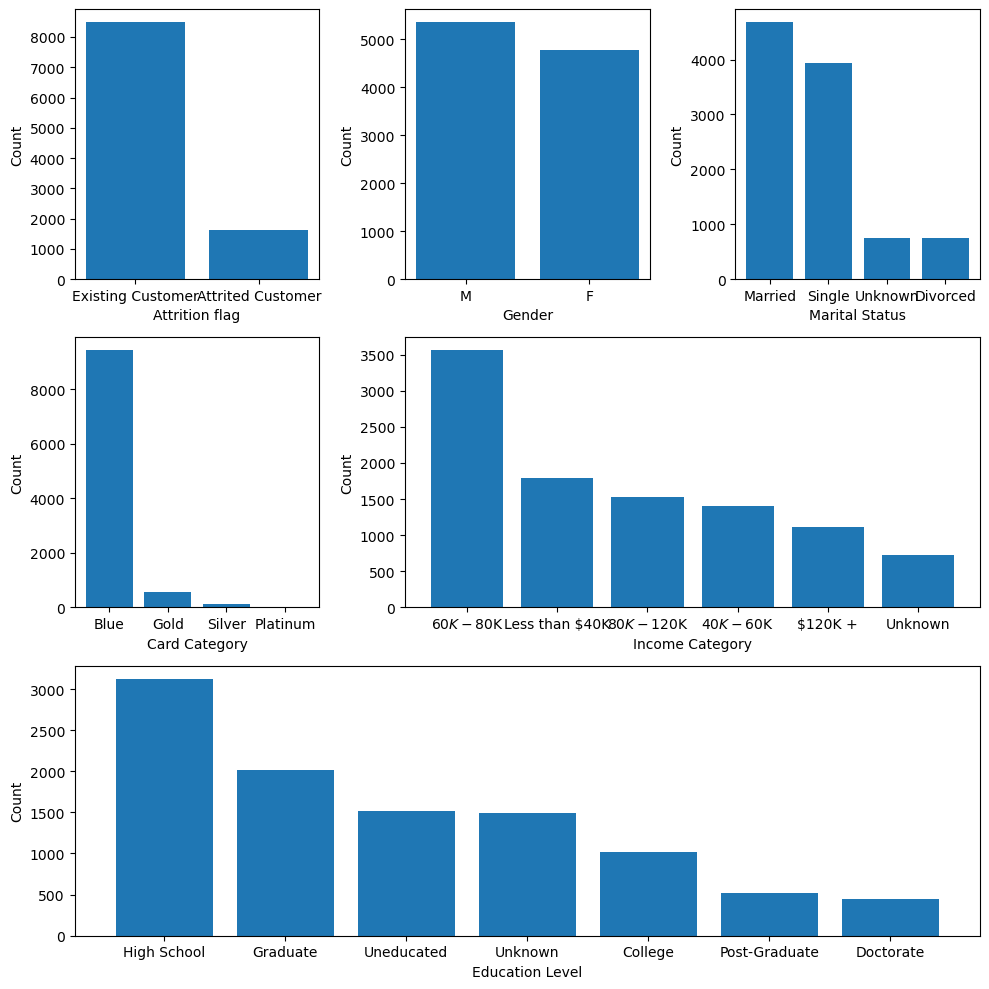

In [7]:
#A plot of the categorical features
plt.figure(figsize = (10, 10))
G = gridspec.GridSpec(3,3)

ax1 = plt.subplot(G[0, 0])
ax1.bar(churn_df["Attrition_Flag"].unique(), churn_df["Attrition_Flag"].value_counts())

ax1.set_xlabel('Attrition flag')
ax1.set_ylabel('Count')

ax2 = plt.subplot(G[0, 1])
ax2.bar(churn_df["Gender"].unique(), churn_df["Gender"].value_counts())
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')

ax3 = plt.subplot(G[0, 2])
ax3.bar(churn_df["Marital_Status"].unique(), churn_df["Marital_Status"].value_counts())
ax3.set_xlabel('Marital Status')
ax3.set_ylabel('Count')

ax4 = plt.subplot(G[1, 0])
ax4.bar(churn_df["Card_Category"].unique(), churn_df["Card_Category"].value_counts())
ax4.set_xlabel('Card Category')
ax4.set_ylabel('Count')

ax5 = plt.subplot(G[1, 1:3])
ax5.bar(churn_df["Income_Category"].unique(), churn_df["Income_Category"].value_counts())
ax5.set_xlabel('Income Category')
ax5.set_ylabel('Count')

ax6 = plt.subplot(G[2, :])
ax6.bar(churn_df["Education_Level"].unique(), churn_df["Education_Level"].value_counts())
ax6.set_xlabel('Education Level')
ax6.set_ylabel('Count')
plt.tight_layout()

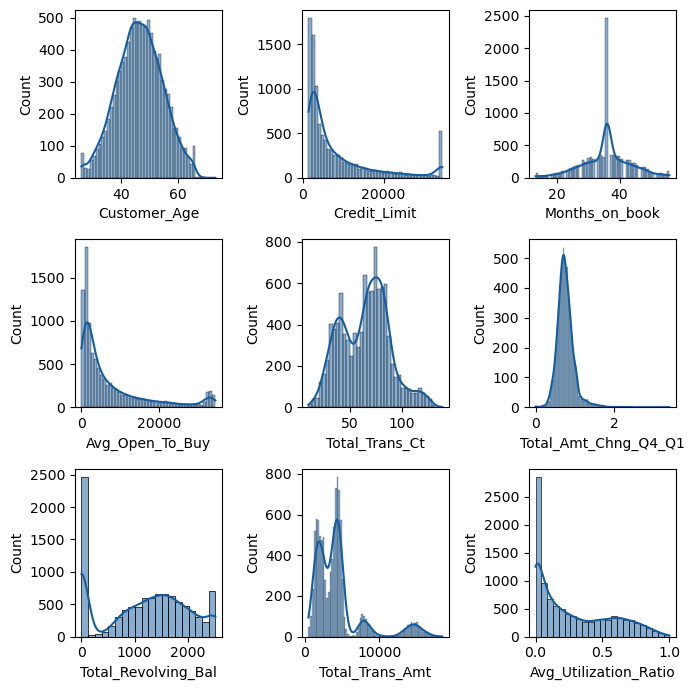

In [8]:
# Histogram plots showing the distribution of the continuous attributes
fig, axs = plt.subplots(3, 3, figsize=(7, 7))

sns.histplot(data=churn_df, x="Customer_Age", kde=True, color="#145DA0", ax=axs[0, 0])
sns.histplot(data=churn_df, x="Credit_Limit", kde=True, color="#145DA0", ax=axs[0, 1])
sns.histplot(data=churn_df, x="Months_on_book", kde=True, color="#145DA0", ax=axs[0, 2])
sns.histplot(data=churn_df, x="Avg_Open_To_Buy", kde=True, color="#145DA0", ax=axs[1, 0])
sns.histplot(data=churn_df, x="Total_Trans_Ct", kde=True, color="#145DA0", ax=axs[1, 1])
sns.histplot(data=churn_df, x="Total_Amt_Chng_Q4_Q1", kde=True, color="#145DA0", ax=axs[1, 2])
sns.histplot(data=churn_df, x="Total_Revolving_Bal", kde=True, color="#145DA0", ax=axs[2, 0])
sns.histplot(data=churn_df, x="Total_Trans_Amt", kde=True, color="#145DA0", ax=axs[2, 1])
sns.histplot(data=churn_df, x="Avg_Utilization_Ratio", kde=True, color="#145DA0", ax=axs[2, 2])
plt.tight_layout()
plt.show()
#Months_Inactive_12_mon	Contacts_Count_12_mon	Credit_Limit	Total_Revolving_Bal	Avg_Open_To_Buy	Total_Amt_Chng_Q4_Q1	Total_Trans_Amt	Total_Trans_Ct	Total_Ct_Chng_Q4_Q1	Avg_Utilization_Ratio

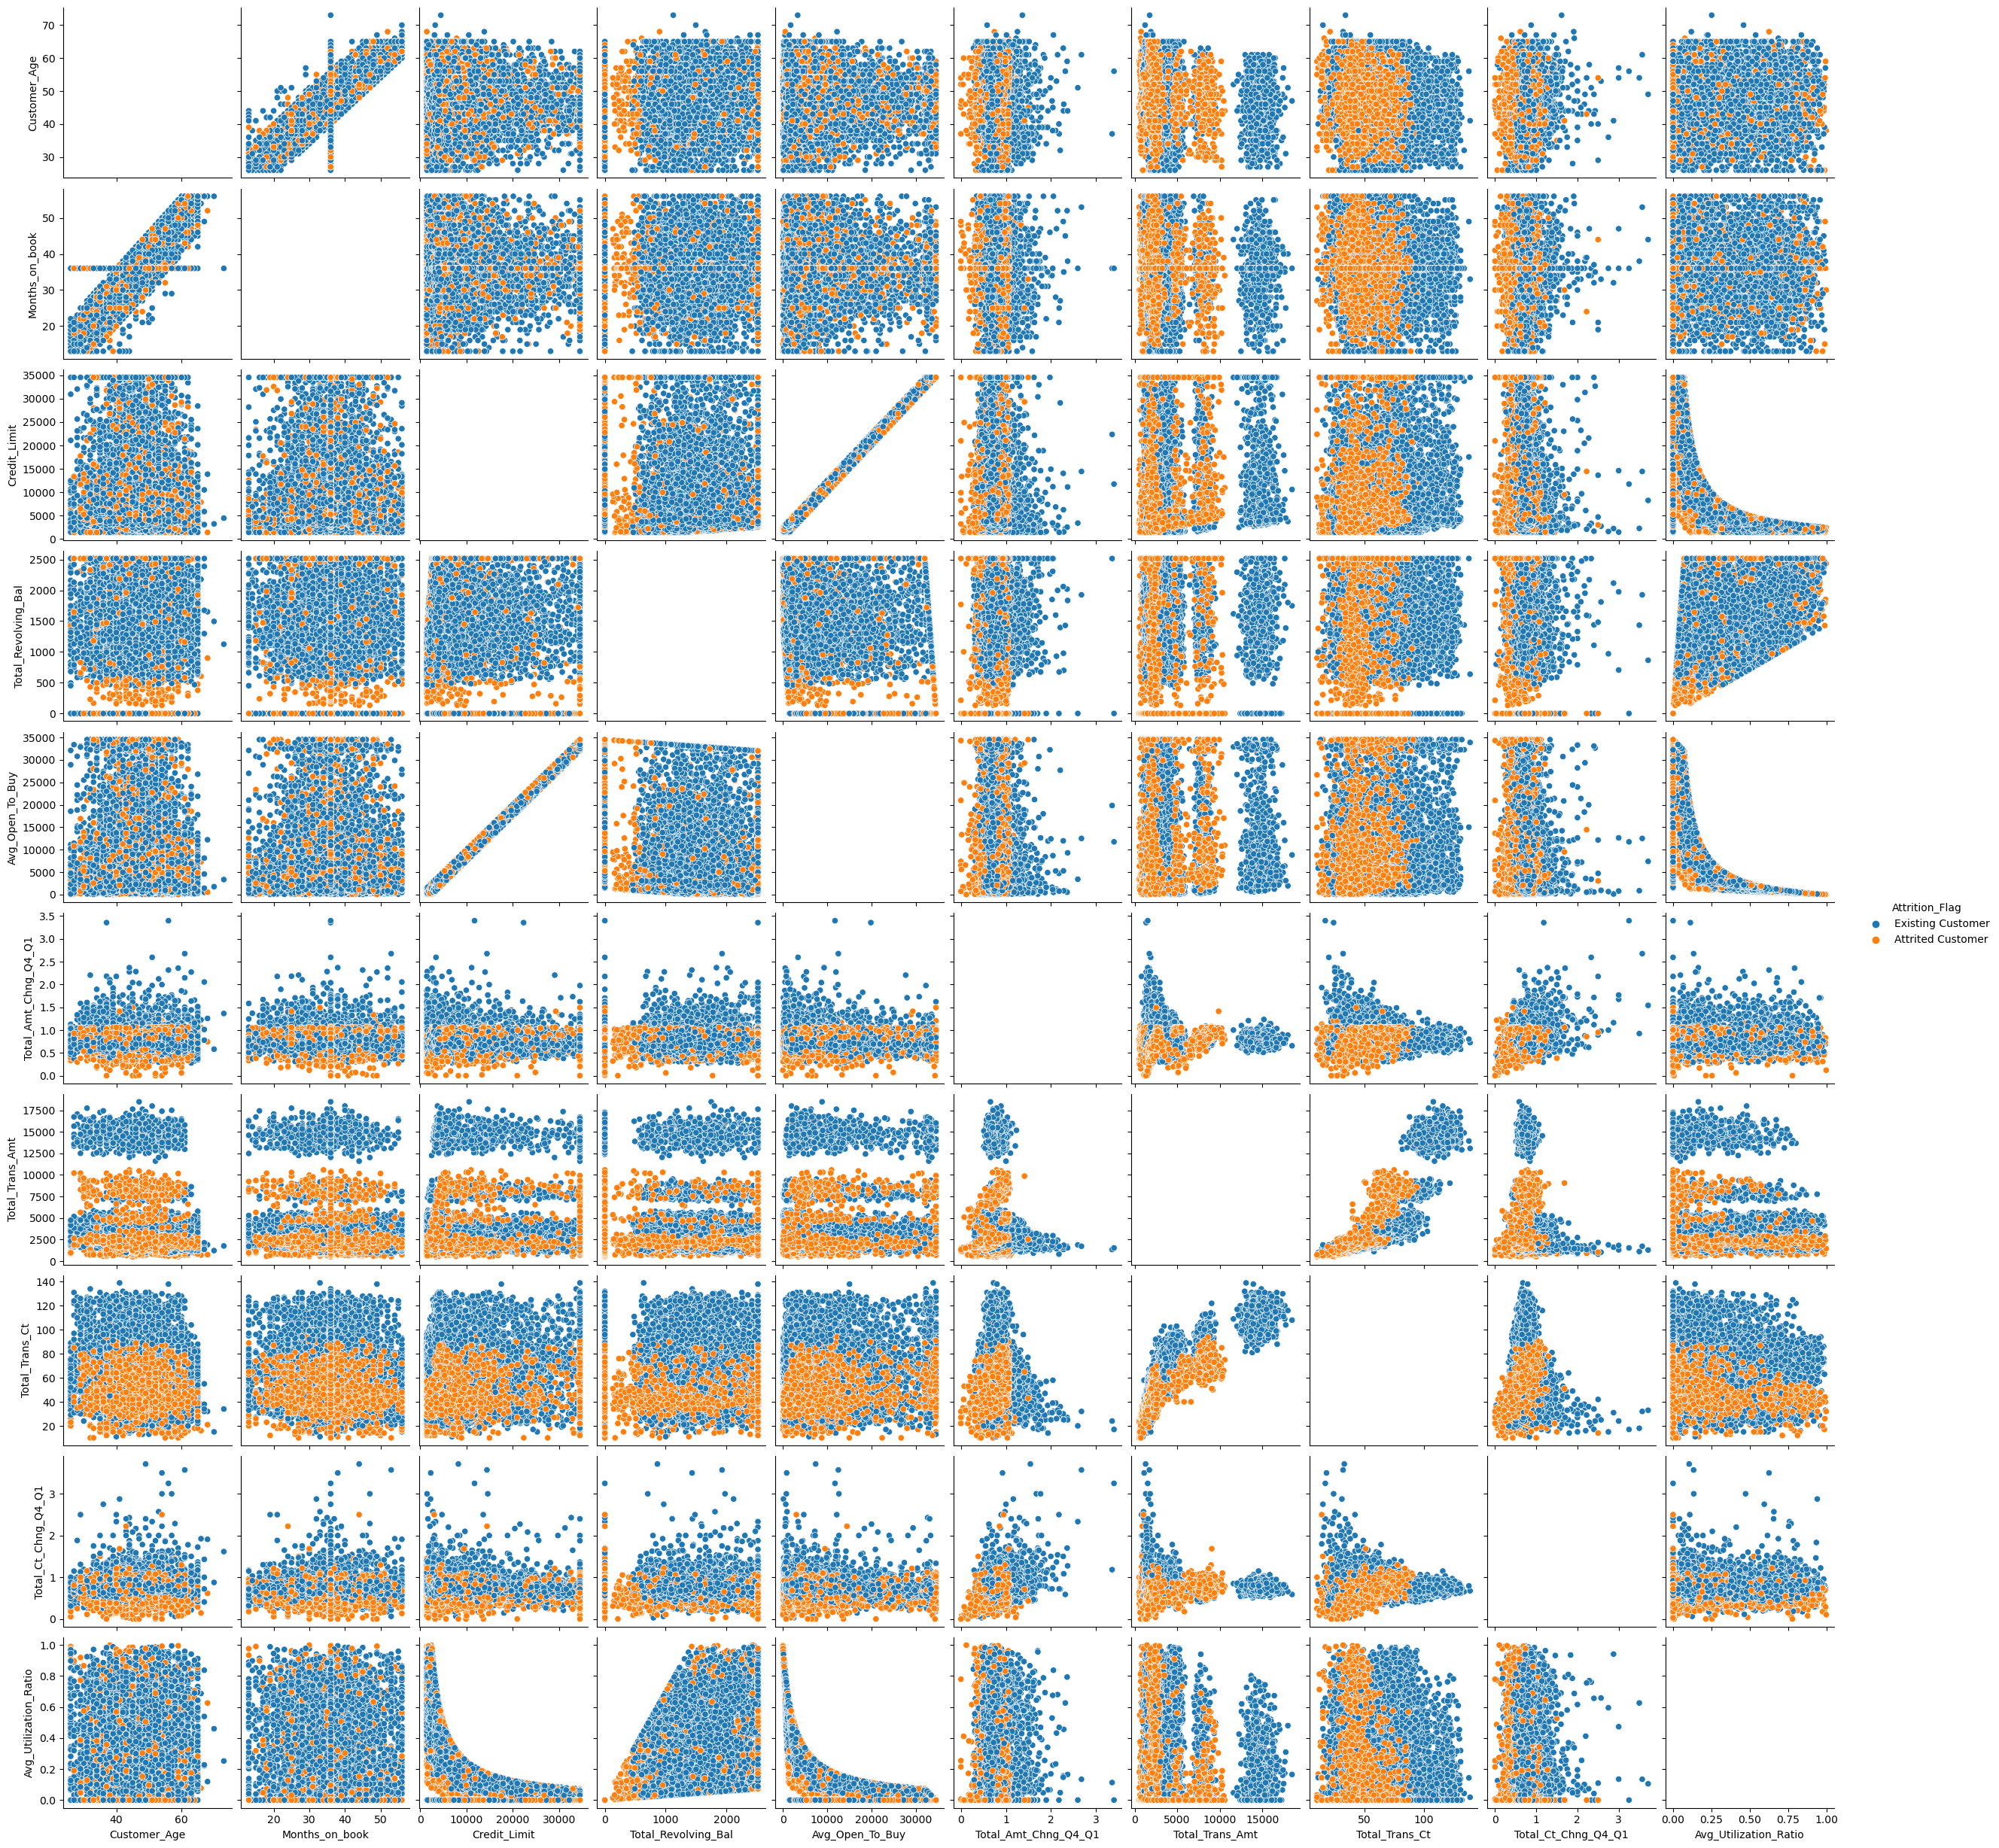

In [9]:
# scatter plot showing the relationships between the continuous attributes
sns.pairplot(churn_df, vars = ["Customer_Age", "Months_on_book", "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"], 
              hue = "Attrition_Flag", diag_kind = "scatter", kind = "scatter")

In [10]:
# correlation matrix for continuous attributes
corr = churn_df.corr()
corr.style.background_gradient(cmap='coolwarm')

## Data Cleaning

In [11]:
churn_df_clean = churn_df.iloc[:, :].replace("Unknown", np.nan)
churn_df_clean.head(10)

Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                            
768805383  Existing Customer            45      M                3   
818770008  Existing Customer            49      F                5   
713982108  Existing Customer            51      M                3   
769911858  Existing Customer            40      F                4   
709106358  Existing Customer            40      M                3   
713061558  Existing Customer            44      M                2   
810347208  Existing Customer            51      M                4   
818906208  Existing Customer            32      M                0   
710930508  Existing Customer            37      M                3   
719661558  Existing Customer            48      M                2   

          Education_Level Marital_Status Income_Category Card_Category  \
CLIENTNUM                                                                
768805383     High School        Married     $60K - $80K          Blue   
818770008        Graduate         Single  Less than $40K          Blue   
713982108        Graduate        Married    $80K - $120K          Blue   
769911858     High School            NaN  Less than $40K          Blue   
709106358      Uneducated        Married     $60K - $80K          Blue   
713061558        Graduate        Married     $40K - $60K          Blue   
810347208             NaN        Married         $120K +          Gold   
818906208     High School            NaN     $60K - $80K        Silver   
710930508      Uneducated         Single     $60K - $80K          Blue   
719661558        Graduate         Single    $80K - $120K          Blue   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
768805383              39                         5                       1   
818770008              44                         6                       1   
713982108              36                         4                       1   
769911858              34                         3                       4   
709106358              21                         5                       1   
713061558              36                         3                       1   
810347208              46                         6                       1   
818906208              27                         2                       2   
710930508              36                         5                       2   
719661558              36                         6                       3   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   
769911858                      1        3313.0                 2517   
709106358                      0        4716.0                    0   
713061558                      2        4010.0                 1247   
810347208                      3       34516.0                 2264   
818906208                      2       29081.0                 1396   
710930508                      0       22352.0                 2517   
719661558                      3       11656.0                 1677   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
768805383          11914.0                 1.335             1144   
818770008           7392.0                 1.541             1291   
713982108           3418.0                 2.594             1887   
769911858            796.0                 1.405             1171   
709106358           4716.0                 2.175              816   

In [12]:
churn_df_clean.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [13]:
#replacing the missing values with the most frequent value
churn_df_clean['Education_Level'] = churn_df_clean['Education_Level'].fillna(churn_df_clean['Education_Level'].mode()[0])
churn_df_clean["Marital_Status"] = churn_df_clean['Marital_Status'].fillna(churn_df_clean['Marital_Status'].mode()[0])
churn_df_clean["Income_Category"] = churn_df_clean['Income_Category'].fillna(churn_df_clean['Income_Category'].mode()[0])

In [14]:
#convert the  ordinal attributes (education level and Income level) to numeric
education_mapping = {"Uneducated" : 0, "High School" : 1, "College": 2, 
                    "Graduate": 3, "Post-Graduate":4, "Doctorate": 5}

income_mapping = {"Less than $40K": 0, "$40K - $60K": 1, "$80K - $120K":2,
                  "$60K - $80K": 3, "$120K +": 4}



churn_df_clean["Education_Level"] = churn_df_clean["Education_Level"].map(education_mapping)
churn_df_clean["Income_Category"] = churn_df_clean["Income_Category"].map(income_mapping)

churn_df_clean.head()


Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                            
768805383  Existing Customer            45      M                3   
818770008  Existing Customer            49      F                5   
713982108  Existing Customer            51      M                3   
769911858  Existing Customer            40      F                4   
709106358  Existing Customer            40      M                3   

           Education_Level Marital_Status  Income_Category Card_Category  \
CLIENTNUM                                                                  
768805383                1        Married                3          Blue   
818770008                3         Single                0          Blue   
713982108                3        Married                2          Blue   
769911858                1        Married                0          Blue   
709106358                0        Married                3          Blue   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
768805383              39                         5                       1   
818770008              44                         6                       1   
713982108              36                         4                       1   
769911858              34                         3                       4   
709106358              21                         5                       1   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   
769911858                      1        3313.0                 2517   
709106358                      0        4716.0                    0   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
768805383          11914.0                 1.335             1144   
818770008           7392.0                 1.541             1291   
713982108           3418.0                 2.594             1887   
769911858            796.0                 1.405             1171   
709106358           4716.0                 2.175              816   

           Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
CLIENTNUM                                                              
768805383              42                1.625                  0.061  
818770008              33                3.714                  0.105  
713982108              20                2.333                  0.000  
769911858              20                2.333                  0.760  
709106358              28                2.500                  0.000

In [15]:
#separate the data into target and feature
features = churn_df_clean.iloc[:, 1:]
target = churn_df_clean.iloc[:, 0]

#convert the nominal attributes into numeric
features = pd.get_dummies(features, drop_first = True)
features.head()

Customer_Age  Dependent_count  Education_Level  Income_Category  \
CLIENTNUM                                                                    
768805383            45                3                1                3   
818770008            49                5                3                0   
713982108            51                3                3                2   
769911858            40                4                1                0   
709106358            40                3                0                3   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
768805383              39                         5                       1   
818770008              44                         6                       1   
713982108              36                         4                       1   
769911858              34                         3                       4   
709106358              21                         5                       1   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  ...  \
CLIENTNUM                                                            ...   
768805383                      3       12691.0                  777  ...   
818770008                      2        8256.0                  864  ...   
713982108                      0        3418.0                    0  ...   
769911858                      1        3313.0                 2517  ...   
709106358                      0        4716.0                    0  ...   

           Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
CLIENTNUM                                                         
768805383             1144              42                1.625   
818770008             1291              33                3.714   
713982108             1887              20                2.333   
769911858             1171              20                2.333   
709106358              816              28                2.500   

           Avg_Utilization_Ratio  Gender_M  Marital_Status_Married  \
CLIENTNUM                                                            
768805383                  0.061         1                       1   
818770008                  0.105         0                       0   
713982108                  0.000         1                       1   
769911858                  0.760         0                       1   
709106358                  0.000         1                       1   

           Marital_Status_Single  Card_Category_Gold  Card_Category_Platinum  \
CLIENTNUM                                                                      
768805383                      0                   0                       0   
818770008                      1                   0                       0   
713982108                      0                   0                       0   
769911858                      0                   0                       0   
709106358                      0                   0                       0   

           Card_Category_Silver  
CLIENTNUM                        
768805383                     0  
818770008                     0  
713982108                     0  
769911858                     0  
709106358                     0  

[5 rows x 22 columns]

In [16]:
X = features.values
y = target.values

#convert the class attribute from string to integer
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## Machine Learning Pipeline Functions

In [17]:
def train_model(feature, target, modelname):
    """
    This function splits the data into train and test
    and then splits the train data into training and validation data
    The model is applied to the training data
    input:
        feature: numpy array of all the attributes
        target: numpy array of the target attribute
        model: the machine learning algorithm pipeline
    output:
        classification report of the training data
        AUC score of the training data
        classification report of the validation data
        confusion matrix of the validation data
        AUC score of the validationn data     
    """
    X = feature
    y = target
    #split data into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    #split training data into training and validation data
    X_trainset, X_valset, y_trainset, y_valset = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)
    model = modelname
    model = model.fit(X_trainset, y_trainset)
    y_trainset_pred =  model.predict(X_trainset)
    #classification report for the training data to check for overfitting
    print("Training data Classification report")
    print(classification_report(y_trainset, y_trainset_pred))
    y_train_prob = model.predict_proba(X_trainset)[:, 1]
    auc_score_train= roc_auc_score(y_trainset, y_train_prob)
     #= roc_auc_score(y_trainset, y_trainset_pred)
    print(f"AUC score of training dataset is {auc_score_train}")
    print(" ")
    # fit the model to the validation data 
    y_valset_pred = model.predict(X_valset)
    print("Validation data Classification report")
    print(classification_report(y_valset, y_valset_pred))
    y_valset_prob = model.predict_proba(X_valset)[:, 1]
    auc_score_valset= roc_auc_score(y_valset, y_valset_prob)
    print(f"AUC score of validation dataset is {auc_score_valset}")
    report_test = confusion_matrix(y_valset, y_valset_pred)
    report_display = ConfusionMatrixDisplay(confusion_matrix = report_test, display_labels = ["Attrited", "Existing"])
    report_display.plot(cmap=plt.cm.Blues)
    plt.show() 
    return None

In [18]:
def train_model_smote(feature, label, modelname):
    """
    This function splits the data into train and test
    and then splits the train data into training and validation data
    SMOTE is applied to the training data
    The model is applied to the training data
    and evaluated on the validation data
    input:
        feature: numpy array of all the attributes
        target: numpy array of the target attribute
        model: the machine learning algorithm pipeline
    output:
        classification report of the training data
        AUC score of the training data
        classification report of the validation data
        confusion matrix of the validation data
        AUC score of the validationn data     
    """
    X = feature
    y = label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    X_trainset, X_valset, y_trainset, y_valset = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)
    smote = SMOTE(random_state = 42)
    X_train_smote, y_train_smote= smote.fit_resample(X_trainset, y_trainset)
    model = modelname
    model = model.fit(X_train_smote, y_train_smote)
    y_train_smote_pred =  model.predict(X_train_smote)
    #classification report for the training data to check for overfitting
    print("Training data Classification report")
    print(classification_report(y_train_smote, y_train_smote))
    y_train_smote_prob = model.predict_proba(X_train_smote)[:, 1]
    auc_score_train_smote = roc_auc_score(y_train_smote, y_train_smote_pred)
    print(f"AUC score of training dataset is {auc_score_train_smote}")
    print(" ")
    # apply the model to the validation data 
    y_valset_pred = model.predict(X_valset)
    print("Validation data Classification report")
    print(classification_report(y_valset, y_valset_pred))
    y_valset_prob = model.predict_proba(X_valset)[:, 1]
    auc_score_valset= roc_auc_score(y_valset, y_valset_prob)
    print(f"AUC score of validation dataset is {auc_score_valset}")
    report_test = confusion_matrix(y_valset, y_valset_pred)
    report_display = ConfusionMatrixDisplay(confusion_matrix = report_test, display_labels = ["Attrited", "Existing"])
    report_display.plot(cmap=plt.cm.Blues)
    plt.show() 
    return None

In [19]:
def optimised_model_evaluation(feature, label, modelname):
    """
    This function splits the data into train and test
    and then splits the train data into training and validation data
    SMOTE is applied to the training data
    The model is applied to the training data
    and evaluated on the test data
    input:
        feature: numpy array of all the attributes
        target: numpy array of the target attribute
        optimised model: the machine learning algorithm pipeline 
        with optimised hyperparameters
        
    output:
        classification report of the test data
        AUC score of the test data
        confusion matrix of the test data     
    """
    X = feature
    y = label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    X_trainset, X_valset, y_trainset, y_valset = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)
    smote = SMOTE(random_state = 42)
    X_train_smote, y_train_smote= smote.fit_resample(X_trainset, y_trainset)
    model = modelname
    model = model.fit(X_train_smote, y_train_smote)
    # apply the model to the test data 
    y_test_pred = model.predict(X_test)
    print("Test data Classification report")
    print(classification_report(y_test, y_test_pred))
    y_test_prob = model.predict_proba(X_test)[:, 1]
    auc_score_test= roc_auc_score(y_test, y_test_prob)
    print(f"AUC score of test data is {auc_score_test}")
    report_test = confusion_matrix(y_test, y_test_pred)
    report_display = ConfusionMatrixDisplay(confusion_matrix = report_test, display_labels = ["Attrited", "Existing"])
    report_display.plot(cmap=plt.cm.Blues)
    plt.show() 
    return None

## Decision Tree Algorithm

Training data Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       781
           1       1.00      1.00      1.00      4180

    accuracy                           1.00      4961
   macro avg       1.00      1.00      1.00      4961
weighted avg       1.00      1.00      1.00      4961

AUC score of training dataset is 1.0
 
Validation data Classification report
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       350
           1       0.95      0.96      0.96      1777

    accuracy                           0.93      2127
   macro avg       0.88      0.86      0.87      2127
weighted avg       0.93      0.93      0.93      2127

AUC score of validation dataset is 0.8648492644103223


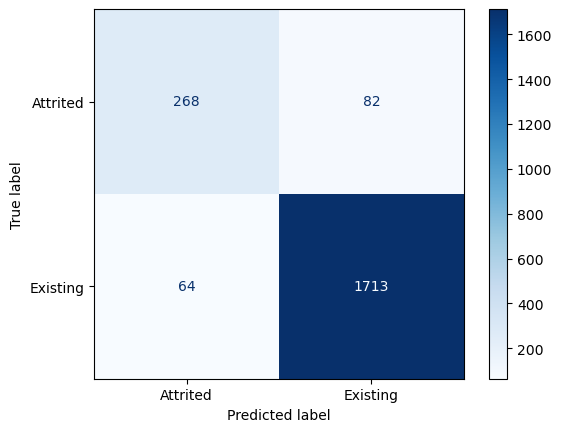

In [20]:
#training the dataset without SMOTE technique
train_model(X, y, DecisionTreeClassifier(random_state = 42))

Training data Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4180
           1       1.00      1.00      1.00      4180

    accuracy                           1.00      8360
   macro avg       1.00      1.00      1.00      8360
weighted avg       1.00      1.00      1.00      8360

AUC score of training dataset is 1.0
 
Validation data Classification report
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       350
           1       0.97      0.94      0.95      1777

    accuracy                           0.92      2127
   macro avg       0.85      0.89      0.87      2127
weighted avg       0.93      0.92      0.92      2127

AUC score of validation dataset is 0.8901961572473671


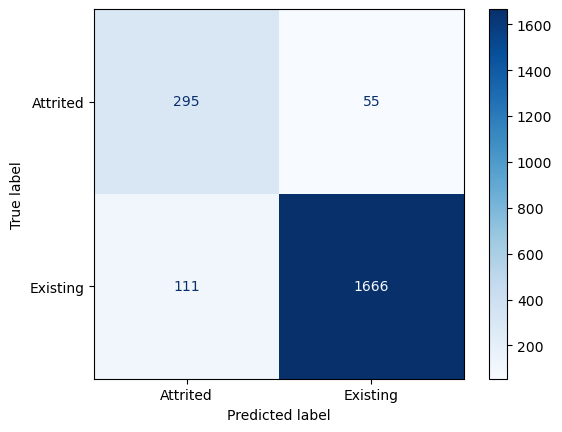

In [21]:
# training the model with SMOTE technique
train_model_smote(X, y, DecisionTreeClassifier(random_state = 42))

Training data Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4180
           1       1.00      1.00      1.00      4180

    accuracy                           1.00      8360
   macro avg       1.00      1.00      1.00      8360
weighted avg       1.00      1.00      1.00      8360

AUC score of training dataset is 0.9741626794258373
 
Validation data Classification report
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       350
           1       0.97      0.94      0.95      1777

    accuracy                           0.93      2127
   macro avg       0.85      0.90      0.87      2127
weighted avg       0.93      0.93      0.93      2127

AUC score of validation dataset is 0.9351410885119383


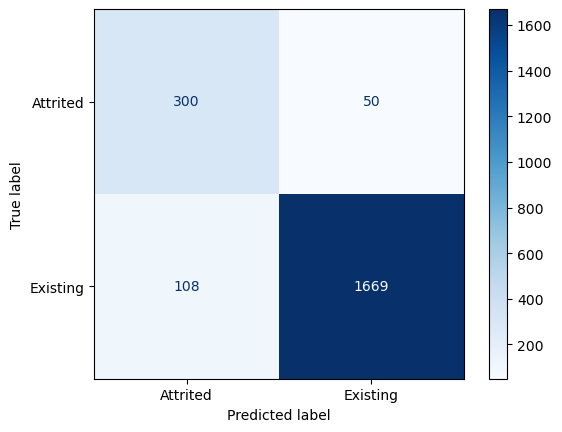

In [22]:
# hyperparameter tuning with SMOTE Technique
train_model_smote(X, y, DecisionTreeClassifier(criterion = "gini", max_depth = 20, 
                                         min_samples_split = 30, random_state = 42))

Test data Classification report
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       496
           1       0.96      0.94      0.95      2543

    accuracy                           0.92      3039
   macro avg       0.84      0.88      0.86      3039
weighted avg       0.92      0.92      0.92      3039

AUC score of test data is 0.927592584958076


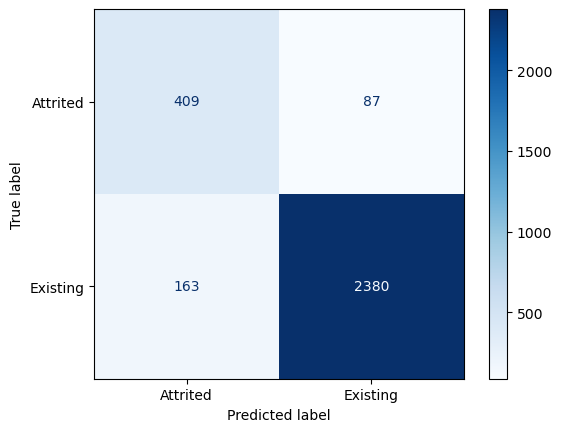

In [23]:
#final model evaluation with optimised model
optimised_model_evaluation(X, y, DecisionTreeClassifier(criterion = "gini", max_depth = 20, 
                                         min_samples_split = 30, random_state = 42))

## Random Forest

Training data Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       781
           1       1.00      1.00      1.00      4180

    accuracy                           1.00      4961
   macro avg       1.00      1.00      1.00      4961
weighted avg       1.00      1.00      1.00      4961

AUC score of training dataset is 1.0
 
Validation data Classification report
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       350
           1       0.96      0.98      0.97      1777

    accuracy                           0.95      2127
   macro avg       0.92      0.88      0.90      2127
weighted avg       0.95      0.95      0.95      2127

AUC score of validation dataset is 0.9845220676903288


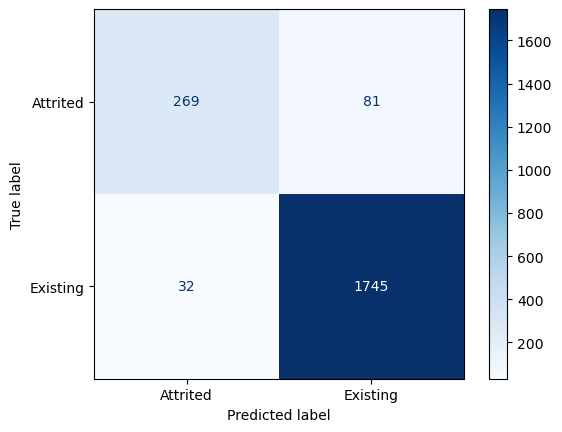

In [24]:
#training the dataset without SMOTE technique
train_model(X, y, RandomForestClassifier(random_state = 42))


Training data Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4180
           1       1.00      1.00      1.00      4180

    accuracy                           1.00      8360
   macro avg       1.00      1.00      1.00      8360
weighted avg       1.00      1.00      1.00      8360

AUC score of training dataset is 1.0
 
Validation data Classification report
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       350
           1       0.96      0.97      0.97      1777

    accuracy                           0.95      2127
   macro avg       0.91      0.89      0.90      2127
weighted avg       0.94      0.95      0.94      2127

AUC score of validation dataset is 0.9807042366749739


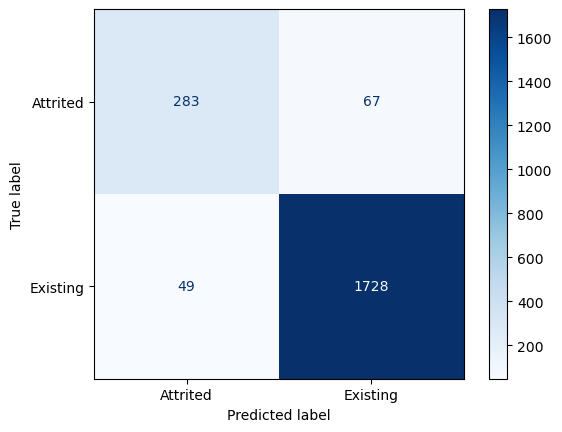

In [25]:
# training the model with SMOTE technique
train_model_smote(X, y, RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=231, 
                  max_depth = 52, min_samples_split= 2))

Training data Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4180
           1       1.00      1.00      1.00      4180

    accuracy                           1.00      8360
   macro avg       1.00      1.00      1.00      8360
weighted avg       1.00      1.00      1.00      8360

AUC score of training dataset is 1.0
 
Validation data Classification report
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       350
           1       0.96      0.97      0.97      1777

    accuracy                           0.95      2127
   macro avg       0.91      0.89      0.90      2127
weighted avg       0.94      0.95      0.94      2127

AUC score of validation dataset is 0.9807042366749739


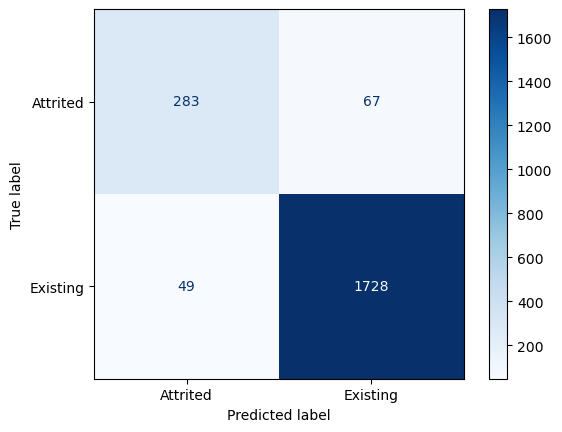

In [26]:
# hyperparameter tuning with SMOTE Technique
train_model_smote(X, y, RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=231, 
                  max_depth = 52, min_samples_split= 2))

Test data Classification report
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       496
           1       0.96      0.98      0.97      2543

    accuracy                           0.95      3039
   macro avg       0.92      0.89      0.91      3039
weighted avg       0.95      0.95      0.95      3039

AUC score of test data is 0.9836386728907944


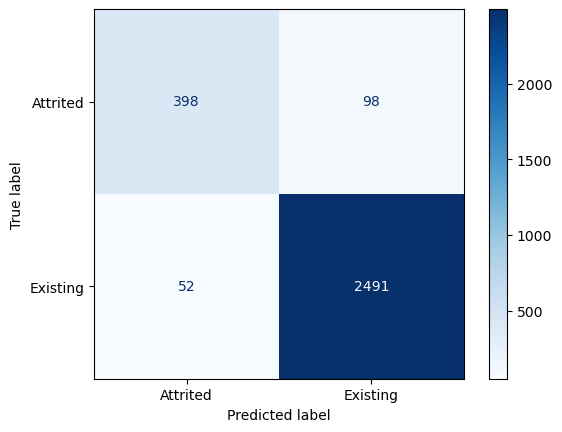

In [27]:

#final model evaluation with optimised model
optimised_model_evaluation(X, y, RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=231, 
                  max_depth = 52, min_samples_split= 2))

## Support Vector Machine (SVM)

Training data Classification report
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       781
           1       0.95      0.99      0.97      4180

    accuracy                           0.95      4961
   macro avg       0.94      0.86      0.90      4961
weighted avg       0.95      0.95      0.95      4961

AUC score of training dataset is 0.9761226559006058
 
Validation data Classification report
              precision    recall  f1-score   support

           0       0.81      0.63      0.71       350
           1       0.93      0.97      0.95      1777

    accuracy                           0.91      2127
   macro avg       0.87      0.80      0.83      2127
weighted avg       0.91      0.91      0.91      2127

AUC score of validation dataset is 0.9518570624648284


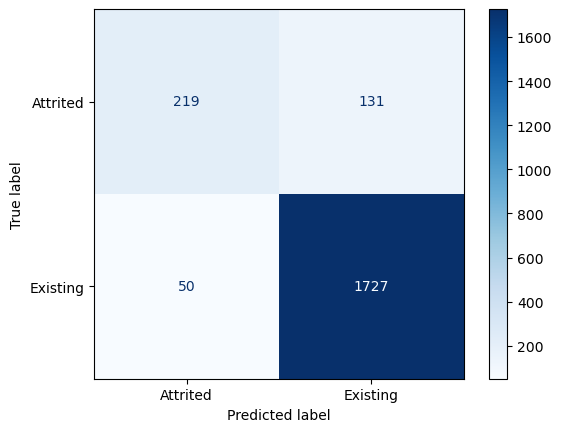

In [28]:
#training the dataset without SMOTE technique
train_model(X, y, make_pipeline(StandardScaler(),svm.SVC(random_state = 42, probability = True)))

Training data Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4180
           1       1.00      1.00      1.00      4180

    accuracy                           1.00      8360
   macro avg       1.00      1.00      1.00      8360
weighted avg       1.00      1.00      1.00      8360

AUC score of training dataset is 0.968421052631579
 
Validation data Classification report
              precision    recall  f1-score   support

           0       0.68      0.80      0.74       350
           1       0.96      0.93      0.94      1777

    accuracy                           0.91      2127
   macro avg       0.82      0.86      0.84      2127
weighted avg       0.91      0.91      0.91      2127

AUC score of validation dataset is 0.9521312002572553


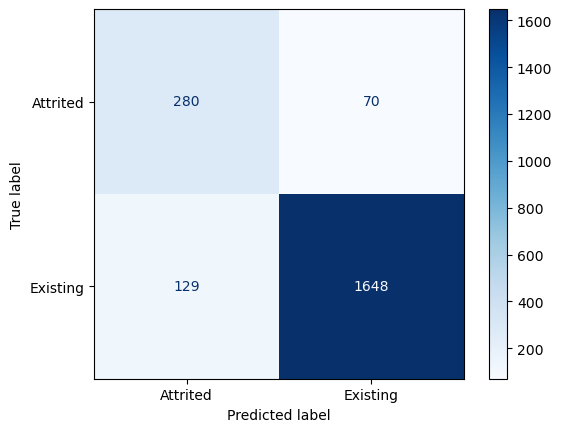

In [29]:
# training the model with SMOTE technique
train_model_smote(X, y, make_pipeline(StandardScaler(),svm.SVC(random_state = 42, probability = True)))

Training data Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4180
           1       1.00      1.00      1.00      4180

    accuracy                           1.00      8360
   macro avg       1.00      1.00      1.00      8360
weighted avg       1.00      1.00      1.00      8360

AUC score of training dataset is 0.9592105263157894
 
Validation data Classification report
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       350
           1       0.96      0.93      0.95      1777

    accuracy                           0.91      2127
   macro avg       0.83      0.88      0.85      2127
weighted avg       0.92      0.91      0.91      2127

AUC score of validation dataset is 0.9548114800225099


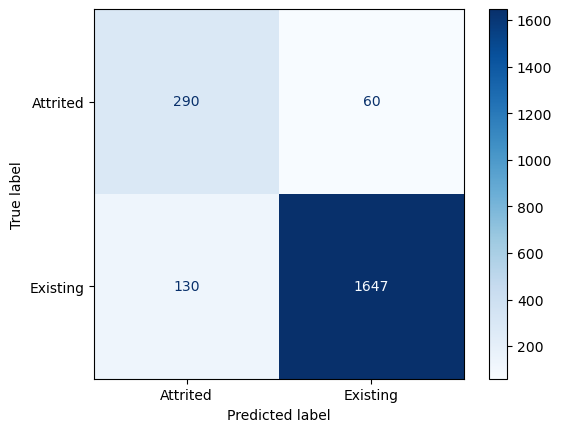

In [30]:
# hyperparameter tuning with SMOTE Technique
train_model_smote(X, y, make_pipeline(StandardScaler(),svm.SVC(C=15,kernel='rbf', gamma=0.01, probability = True)))

Test data Classification report
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       496
           1       0.97      0.93      0.95      2543

    accuracy                           0.92      3039
   macro avg       0.84      0.88      0.86      3039
weighted avg       0.92      0.92      0.92      3039

AUC score of test data is 0.9598454961754594


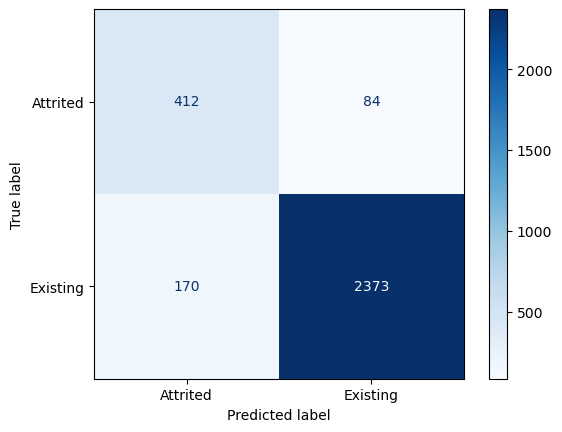

In [31]:
#final model evaluation with optimised model
optimised_model_evaluation(X, y, make_pipeline(StandardScaler(),svm.SVC(C=15,kernel='rbf', gamma=0.01, probability = True)))

## Adaboost Algorithm

Training data Classification report
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       781
           1       0.98      0.98      0.98      4180

    accuracy                           0.97      4961
   macro avg       0.94      0.93      0.94      4961
weighted avg       0.97      0.97      0.97      4961

AUC score of training dataset is 0.9918805788187148
 
Validation data Classification report
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       350
           1       0.97      0.98      0.97      1777

    accuracy                           0.95      2127
   macro avg       0.92      0.91      0.91      2127
weighted avg       0.95      0.95      0.95      2127

AUC score of validation dataset is 0.9829367312484927


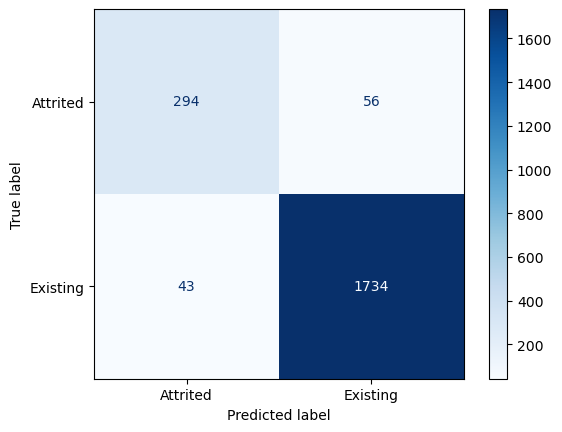

In [32]:
#training the dataset without SMOTE technique
train_model(X, y, AdaBoostClassifier(random_state = 42))

Training data Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4180
           1       1.00      1.00      1.00      4180

    accuracy                           1.00      8360
   macro avg       1.00      1.00      1.00      8360
weighted avg       1.00      1.00      1.00      8360

AUC score of training dataset is 0.9696172248803828
 
Validation data Classification report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       350
           1       0.97      0.96      0.97      1777

    accuracy                           0.94      2127
   macro avg       0.89      0.92      0.90      2127
weighted avg       0.95      0.94      0.95      2127

AUC score of validation dataset is 0.9778631722807299


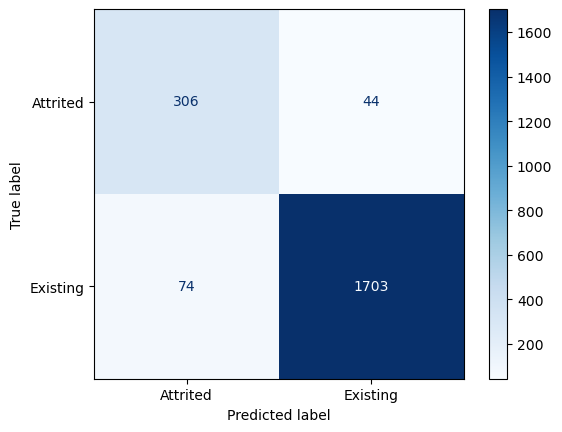

In [33]:
# training the model with SMOTE technique
train_model_smote(X, y, AdaBoostClassifier(random_state = 42))

Training data Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4180
           1       1.00      1.00      1.00      4180

    accuracy                           1.00      8360
   macro avg       1.00      1.00      1.00      8360
weighted avg       1.00      1.00      1.00      8360

AUC score of training dataset is 0.9763157894736841
 
Validation data Classification report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       350
           1       0.98      0.97      0.97      1777

    accuracy                           0.95      2127
   macro avg       0.91      0.93      0.92      2127
weighted avg       0.95      0.95      0.95      2127

AUC score of validation dataset is 0.9823860438942037


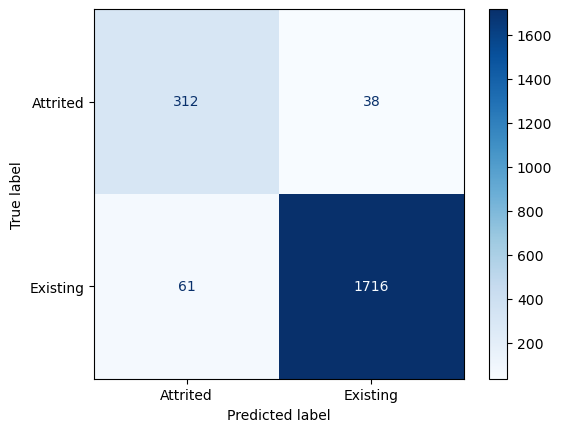

In [34]:
# hyperparameter tuning with SMOTE Technique
train_model_smote(X, y, AdaBoostClassifier(algorithm="SAMME", n_estimators= 300, 
                                           learning_rate=0.9))

Test data Classification report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       496
           1       0.98      0.97      0.97      2543

    accuracy                           0.95      3039
   macro avg       0.91      0.93      0.92      3039
weighted avg       0.96      0.95      0.95      3039

AUC score of test data is 0.9843569634543909


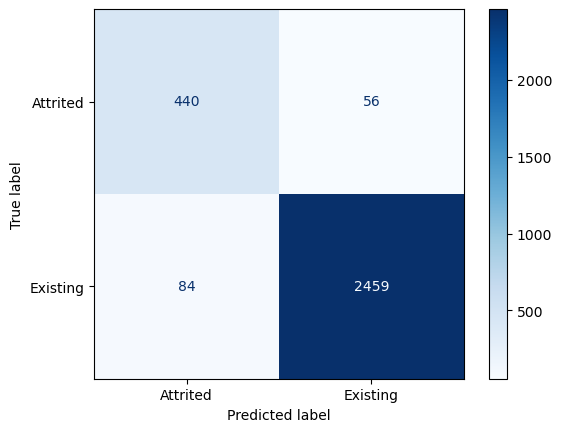

In [35]:
#final model evaluation with optimised model
optimised_model_evaluation(X, y, AdaBoostClassifier(algorithm="SAMME", n_estimators= 300, 
                                           learning_rate=0.9))

## ROC curve for the four models


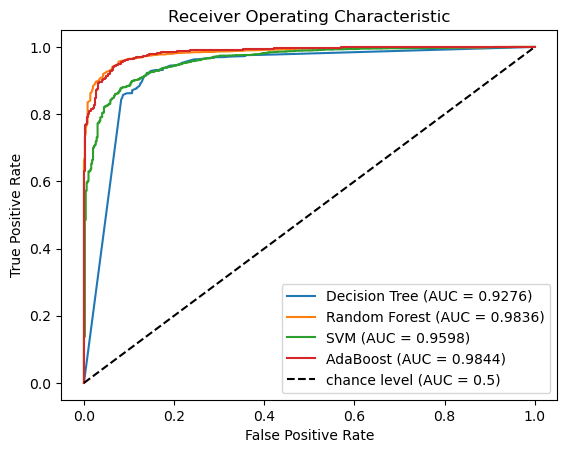

In [36]:

fig, ax = plt.subplots()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# split training data into testing and validation data
X_trainset, X_valset, y_trainset, y_valset = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

# apply smote technique
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote= smote.fit_resample(X_trainset, y_trainset)

#train the four models
model_dt = DecisionTreeClassifier(criterion = "gini", max_depth = 20, min_samples_split = 30, random_state = 42)
model_dt = model_dt.fit(X_train_smote, y_train_smote)

model_rf = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=231, max_depth = 52, min_samples_split= 2)
model_rf = model_rf.fit(X_train_smote, y_train_smote)

model_svm = make_pipeline(StandardScaler(),svm.SVC(C=15,kernel='rbf', gamma=0.01, probability = True))
model_svm = model_svm.fit(X_train_smote, y_train_smote)

model_adb = AdaBoostClassifier(algorithm="SAMME", n_estimators= 300, learning_rate=0.9, random_state = 42)
model_adb = model_adb.fit(X_train_smote, y_train_smote)

#predict the probabiblities for each model
y_test_prob1 = model_dt.predict_proba(X_test)[:, 1]
y_test_prob2 = model_rf.predict_proba(X_test)[:, 1]
y_test_prob3 = model_svm.predict_proba(X_test)[:, 1]
y_test_prob4 = model_adb.predict_proba(X_test)[:, 1]


#calculate false positive rate and true positive rate for each model
fpr1, tpr1, threshold1 = roc_curve(y_test, y_test_prob1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_test_prob2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_test_prob3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_test_prob4) 


#Calculate the AUC for each model
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)


#plot ROC curve for each model
display = RocCurveDisplay(fpr=fpr1, tpr=tpr1, estimator_name = model_rf)
display.plot(ax=ax, name =f"Decision Tree (AUC = {roc_auc1:.4f})")

display = RocCurveDisplay(fpr=fpr2, tpr=tpr2, estimator_name = model_rf)
display.plot(ax=ax, name =f"Random Forest (AUC = {roc_auc2:.4f})")

display = RocCurveDisplay(fpr=fpr3, tpr=tpr3, estimator_name = model_svm)
display.plot(ax=ax, name =f"SVM (AUC = {roc_auc3:.4f})")

display = RocCurveDisplay(fpr=fpr4, tpr=tpr4, estimator_name = model_adb)
display.plot(ax=ax, name =f"AdaBoost (AUC = {roc_auc4:.4f})" )

display = plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")#random guess plot

plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

#legend
